In [1]:
! pip install kaggle

## **API in use **

In [3]:
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
!kaggle datasets download -d kazanova/sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
 84% 68.0M/80.9M [00:00<00:00, 192MB/s]
100% 80.9M/80.9M [00:00<00:00, 182MB/s]


# **Extrat Zip File**

In [5]:
from zipfile import ZipFile
file_name = "sentiment140.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")



Done


# **Import Some required libraries**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')
from tqdm.notebook import tqdm

# **Downloading Stopwords**

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# **Reading the dataset**

In [9]:
#load the data from csv file to pandas
twitter_data = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1', )

In [10]:
#name the attributes by their names and then read againg the twitter dataset

column_name = ['target', 'id','date', 'flag' , 'user' ,'text']
twitter_data = pd.read_csv('training.1600000.processed.noemoticon.csv', names = column_name , encoding='ISO-8859-1' )
twitter_data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


# **Plotting the dataset**

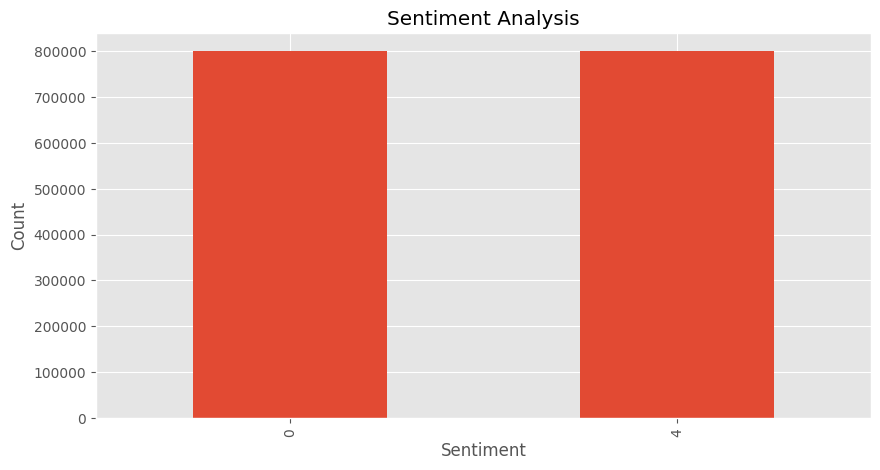

In [11]:
graph = twitter_data['target'].value_counts().sort_index().plot(kind = 'bar' , title = 'Sentiment Analysis' , figsize = (10,5))
graph.set_xlabel('Sentiment')
graph.set_ylabel('Count')
plt.show()

# **Checking If there is any Null Value**

In [12]:
#now calculate the missing values in the dataset
twitter_data.isnull().sum()
# print(sum)

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

# **Changing The Value 4 to 1 to increase readability**

In [13]:
#conver the label 4 to 1
twitter_data.replace({'target':{4:1}} , inplace = True)

In [14]:
twitter_data['target'].value_counts()

target
0    800000
1    800000
Name: count, dtype: int64

# **Stemming**

In [15]:
port_stem = PorterStemmer()

# **Stemmer Function**

In [16]:
def stemmed(textual_data):

  stem = re.sub('[^a-zA-Z]',' ',textual_data)
  stem = stem.lower()
  stem = stem.split()
  stem = [port_stem.stem(word) for word in stem if not word in stopwords.words('english')]
  stem = ' '.join(stem)

  return stem

# **Stemming** The Text field of the dataset

In [17]:
#apply stemming

twitter_data['after_stemming'] = twitter_data['text'].apply(stemmed)

In [18]:
print(twitter_data['after_stemming'])


,target,id,date,flag,user,text,after_stemming
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see


In [19]:
X = twitter_data['after_stemming']
Y = twitter_data['target']

# **Splitting the data-set into 80:20 ratio**

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)

In [21]:
print(X.shape , X_train.shape , X_test.shape)

(1600000,) (1280000,) (320000,)


# **Vectorization Of the Training Dataset**

In [25]:
vec = TfidfVectorizer()
X_train_vec = vec.fit_transform(X_train)
X_test_vec = vec.transform(X_test)

In [26]:
print(X_train_vec)

  (0, 443066)	0.4484755317023172
  (0, 235045)	0.41996827700291095
  (0, 109306)	0.3753708587402299
  (0, 185193)	0.5277679060576009
  (0, 354543)	0.3588091611460021
  (0, 436713)	0.27259876264838384
  (1, 160636)	1.0
  (2, 288470)	0.16786949597862733
  (2, 132311)	0.2028971570399794
  (2, 150715)	0.18803850583207948
  (2, 178061)	0.1619010109445149
  (2, 409143)	0.15169282335109835
  (2, 266729)	0.24123230668976975
  (2, 443430)	0.3348599670252845
  (2, 77929)	0.31284080750346344
  (2, 433560)	0.3296595898028565
  (2, 406399)	0.32105459490875526
  (2, 129411)	0.29074192727957143
  (2, 407301)	0.18709338684973031
  (2, 124484)	0.1892155960801415
  (2, 109306)	0.4591176413728317
  (3, 172421)	0.37464146922154384
  (3, 411528)	0.27089772444087873
  (3, 388626)	0.3940776331458846
  (3, 56476)	0.5200465453608686
  :	:
  (1279996, 390130)	0.22064742191076112
  (1279996, 434014)	0.2718945052332447
  (1279996, 318303)	0.21254698865277746
  (1279996, 237899)	0.2236567560099234
  (1279996, 2910

In [28]:
print(X_test_vec)

  (0, 420984)	0.17915624523539803
  (0, 409143)	0.31430470598079707
  (0, 398906)	0.3491043873264267
  (0, 388348)	0.21985076072061738
  (0, 279082)	0.1782518010910344
  (0, 271016)	0.4535662391658828
  (0, 171378)	0.2805816206356073
  (0, 138164)	0.23688292264071403
  (0, 132364)	0.25525488955578596
  (0, 106069)	0.3655545001090455
  (0, 67828)	0.26800375270827315
  (0, 31168)	0.16247724180521766
  (0, 15110)	0.1719352837797837
  (1, 366203)	0.24595562404108307
  (1, 348135)	0.4739279595416274
  (1, 256777)	0.28751585696559306
  (1, 217562)	0.40288153995289894
  (1, 145393)	0.575262969264869
  (1, 15110)	0.211037449588008
  (1, 6463)	0.30733520460524466
  (2, 400621)	0.4317732461913093
  (2, 256834)	0.2564939661498776
  (2, 183312)	0.5892069252021465
  (2, 89448)	0.36340369428387626
  (2, 34401)	0.37916255084357414
  :	:
  (319994, 123278)	0.4530341382559843
  (319995, 444934)	0.3211092817599261
  (319995, 420984)	0.22631428606830145
  (319995, 416257)	0.23816465111736276
  (319995, 3

# **Model Declaration**

In [29]:
model = LogisticRegression(max_iter=1000)

# **Train The Model**

In [30]:
model.fit(X_train_vec , Y_train)

LogisticRegression(max_iter=1000)

# **Predicting Training Accuracy**

In [31]:


# Predicting the training data
X_train_prediction = model.predict(X_train_vec)
training_data_accuracy = accuracy_score(X_train_prediction , Y_train)
print("Accuracy score of the training data : " , training_data_accuracy)


Accuracy score of the training data :  0.81018984375


# Training Accuracy : 81%

# **Predicting Test Accuracy**

In [32]:
# prompt: test data accuracy

# Predicting the test data
X_test_prediction = model.predict(X_test_vec)
test_data_accuracy = accuracy_score(X_test_prediction , Y_test)
print("Accuracy score of the test data : " , test_data_accuracy)


Accuracy score of the test data :  0.7780375


Testing Accuracy : 77%

# **Import Pickle**

In [33]:
import pickle

# **Save the File and vectorizer**

In [47]:
file_name = 'finalized_model.sav'
vectorizer = 'vec.sav'
pickle.dump(model, open(file_name, 'wb'))
pickle.dump(vec, open(vectorizer, 'wb'))

# TESTING WITH USER INPUT

In [49]:
# prompt: loda the file to generate new prediction

loaded_model = pickle.load(open('finalized_model.sav', 'rb'))
loaded_vec = pickle.load(open('vec.sav', 'rb'))

# Assuming X_new is your new data that needs to be transformed and predicted
X_new = ['Happy learning']
X_new_vec = vec.transform(X_new)
X_new_prediction = loaded_model.predict(X_new_vec)

if X_new_prediction[0] == 1:
    print("Positive")
else:
    print("Negative")

Positive
